<a href="https://colab.research.google.com/github/er-jyotigoel/PGP-AIML-ONLINE-JANUARY-24A/blob/Module1-Introduction-to-Python/Additional_Case_Study_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Exploratory Data Analysis - Week 4</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2022/01/29/13/39/smartphone-6977552_960_720.jpg" width="1600" height="600"></center>

<b><h2><center>Google Play Store Case Study</center></h2></b>

### **Context**
Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails and other offline communications.
Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps.

Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit.
As a Data Scientist, you are required to analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

The dataset provided contains information of over 4000+ apps across different categories along with other useful attributes like Ratings, Reviews etc.

### **Data Description:**

* App: Application Name
* Category: Category the app belongs to (`Others` category contain apps from various different categories excluded from the dataset)
* Rating: Overall user rating of the app
* Reviews: Number of user reviews for the app
* Size: Size of the app in kilobytes
* Installs: Number of user downloads/installs for the app
* Paid/Free: Whether an app is paid or free
* Price: price of an app in dollars
* Content Rating: Age group the app is targeted at
* Ad Supported: whether an app supports an Ad or not (Yes/No)
* In App Purchases: App containing in app purchase feature or not (Yes/No)
* Editors Choice: Whether rated as Editor Choice (Yes/No)

Let's start by importing necessary libraries

### **Importing the necessary packages**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Reading the datasets**

In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIML Online Jan'24/Module 1 - Introduction to Python/Week 3/Additional Case Study/Play_Store_2.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.90,160604.00,270.00,10000000.00,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.40,NaN,46.00,100000.00,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.00,29.00,100000.00,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.00,36.00,5000.00,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.50,12.00,12.00,1000.00,Free,0.00,Everyone,No,No,No


### **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first few rows of the dataset**

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.90,160604.00,270.00,10000000.00,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.40,NaN,46.00,100000.00,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.00,29.00,100000.00,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.00,36.00,5000.00,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.50,12.00,12.00,1000.00,Free,0.00,Everyone,No,No,No


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various attributes related to each App*
- *` Category` columns display the category of the App.*
- *The performance of each App has been defined by the users under `Ratings` and `Reviews` columns*
- *Column `Content Rating` displays the Age Group of the users for which the App has been developed*
- *Dataset has also been categorised on the basis of Ads Present in the App under the `Ad Supported` column and whether some of the features in the App are paid or not under the `In App Purchases` column*
- *` Editors Choice` displays whether the App has been Recommended by the Editor or not*
- *From the head of the dataset, it can be observed that there are some values as NaN, which means the dataset contains some missing values*

#### **Checking the shape of the dataset**

In [5]:
df.shape

(4153, 12)

- *The Dataset has 4153 number of rows with 12 columns*

####**Checking the data types of the columns for the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


- *We can observe that there around 7 object datatype columns and 5 numerical datatype*
- *All the columns does not have 4153 observations, which can be inferred that there are null values present in the dataset*

#### **Getting the statistical summary for the dataset**

In [7]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,War Dragons,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.00,NaN,NaN,NaN,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,4029.00,NaN,NaN,NaN,66964.21,107418.85,1.00,224.00,7461.00,78219.00,312204.00
Size,4153.00,NaN,NaN,NaN,82.25,92.26,0.01,22.00,42.00,84.00,270.00
Installs,4153.00,NaN,NaN,NaN,3232705.64,5421343.28,1.00,10000.00,500000.00,5000000.00,19970000.00
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.00,NaN,NaN,NaN,0.57,8.93,0.00,0.00,0.00,0.00,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- *The above table displays the descriptive analysis for Numerical columns*
- *It can be observed that the average rating of Apps is around 4.19, which means most of the Apps have received ratings above average. As it can be seen that 75% of users have given ratings equal to or greater than 4 to the Apps*
- *50% of the apps have received reviews less than 10000, which means users are not preferring to give reviews for most of the apps. The average value is high because of the range of number of reviews as the maximum number of reviews given to an app is very high*
- *Around 90% of the apps are free of cost in the Play store*  
- *There are around 16 categories of Apps present in the Dataset among which 31% of apps are categorised in the Others category*
- *The distribution of apps containing Ads is almost equal in 50:50 ratio, which means in an overall view, there is no trend whether apps are ad-supported or not*
- *Similarly there is an almost equal distribution of apps which contain in App Purchases or not*
- *Around 80% of the apps are not recommended by the Editors*

### **Missing value treatment**

In [8]:
# checking missing values
df.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

- *The variable `Rating` and `Reviews ` have 223 and 127 missing values in them*
- *There are no missing values in other variables.*

We can impute the missing values for each column seperately

Since the average value of column `Rating` is close to median of that column, hence we can impute the missing values with the mean value of that column

In [9]:
df['Rating'] = df['Rating'].fillna(value= df['Rating'].mean())

For the `Review` column, we can impute the missing values with median as the range is too high to impute the values with the average value of reviews

In [10]:
df['Reviews'] = df['Reviews'].fillna(value= df['Reviews'].median())

Let's check the null values of the dataset again to confirm that imputation has done properly

In [11]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

- *All the missing values have been imputed and there are no missing values in our dataset now*.

### **Exploratory Data Analysis**

### **Univariate Analysis**

**Let us first explore the numerical variables.**

#### **Observations on Rating**

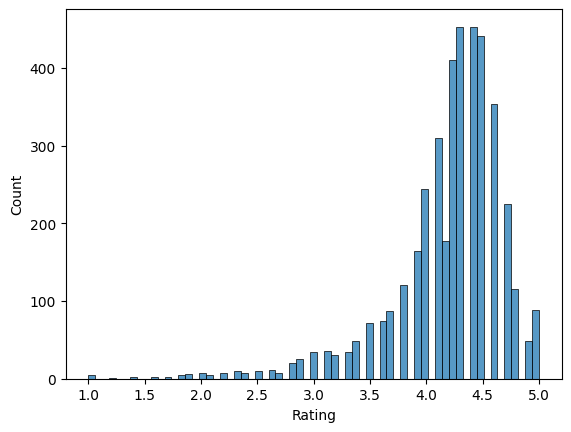

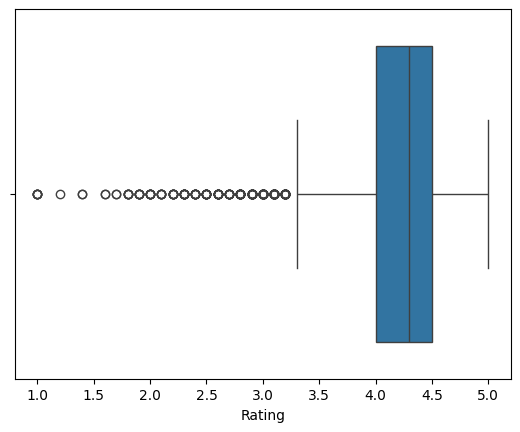

In [12]:
sns.histplot(data=df,x='Rating')
plt.show()
sns.boxplot(data=df,x='Rating')
plt.show()

- *The distribution of Rating is highly left skewed*
- *There are a lot of outliers in this variable*
- *Most of the ratings are on the higher side*

#### **Observations on Reviews**

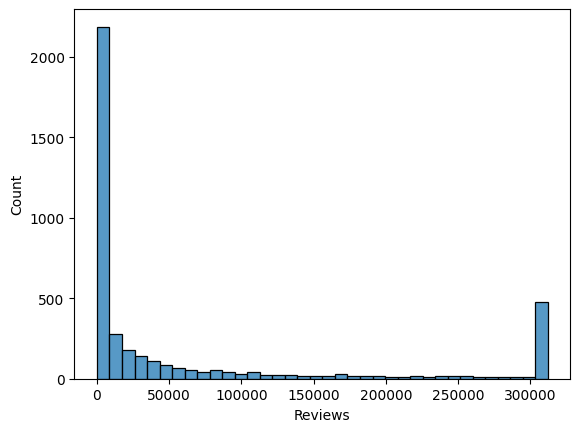

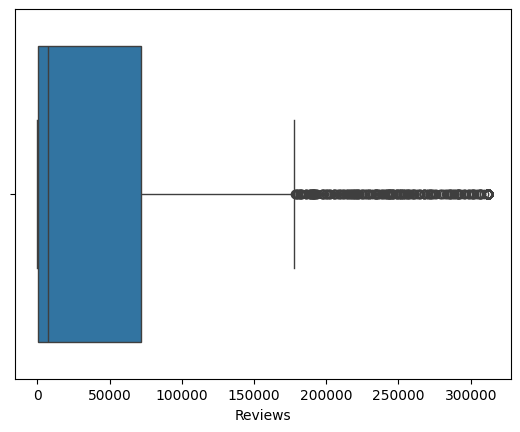

In [13]:
sns.histplot(data=df,x='Reviews')
plt.show()
sns.boxplot(data=df,x='Reviews')
plt.show()

- *The distribution of Reviews is extremely right skewed*
- *There are a lot of outliers in this variable*
- *Most of the reviews are on the lower side*

#### **Observations on Size**

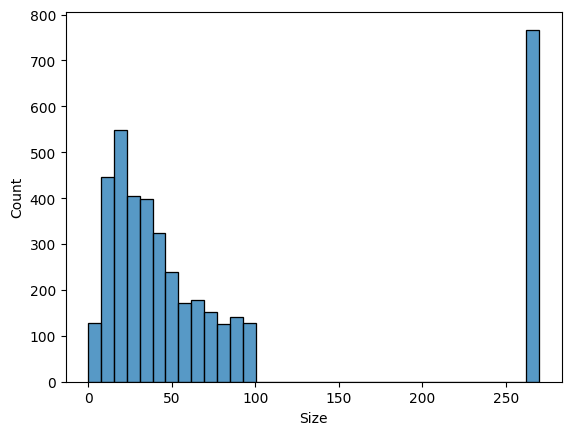

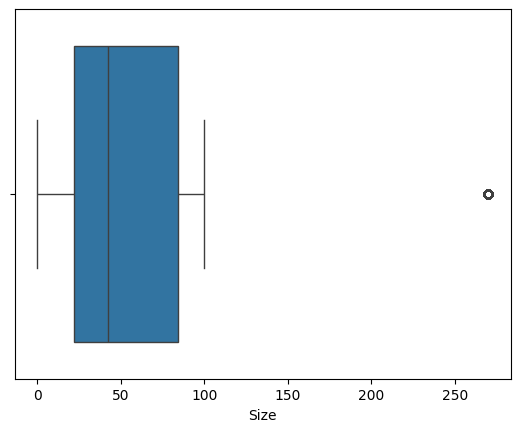

In [14]:
sns.histplot(data=df,x='Size')
plt.show()
sns.boxplot(data=df,x='Size')
plt.show()

- *The distribution of Size is distributed between 0 - 100 kb, which means most of the apps size are in this range*
- *There are some outliers present at the extreme end, which means some of the apps have download size in Megabytes*
- *Most of the reviews are on the lower side*

#### **Observations on Installs**

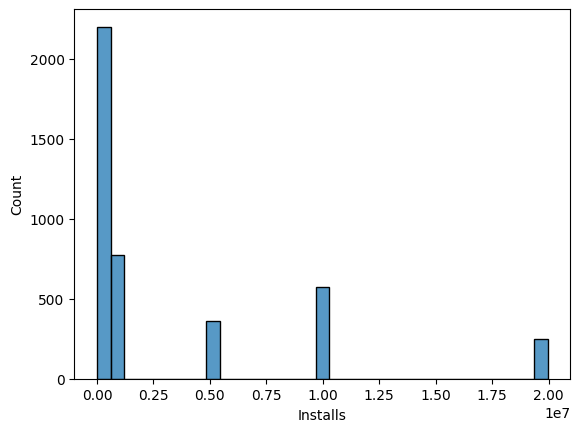

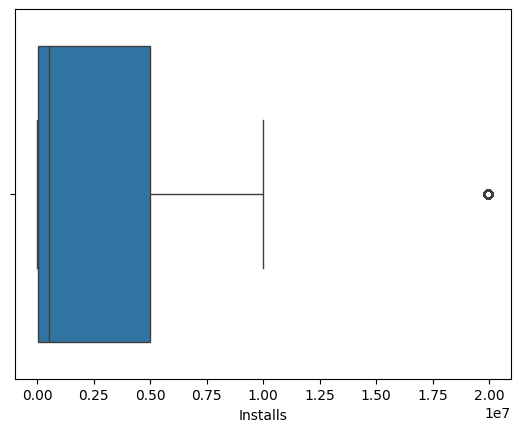

In [15]:
sns.histplot(data=df,x='Installs')
plt.show()
sns.boxplot(data=df,x='Installs')
plt.show()

- *The distribution of installs is randomly distributed as multiple modes can be seen in the plot*
- *From the box plot, it can be observed that most of the apps are installed 25% of the apps which are installed maximum number of times*

#### **Observations on Price**

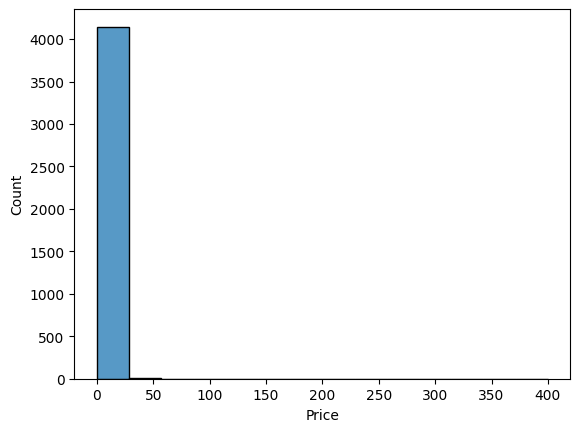

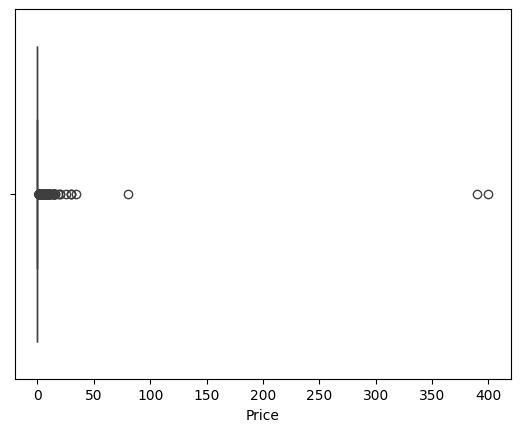

In [16]:
sns.histplot(data=df,x='Price')
plt.show()
sns.boxplot(data=df,x='Price')
plt.show()

- *As we have already seen in our descriptive analysis, most of the apps have zero price to use*
- *From the box plot, it can be observed that there are some outliers present in the price column*

**Let's now explore the Categorical columns.**

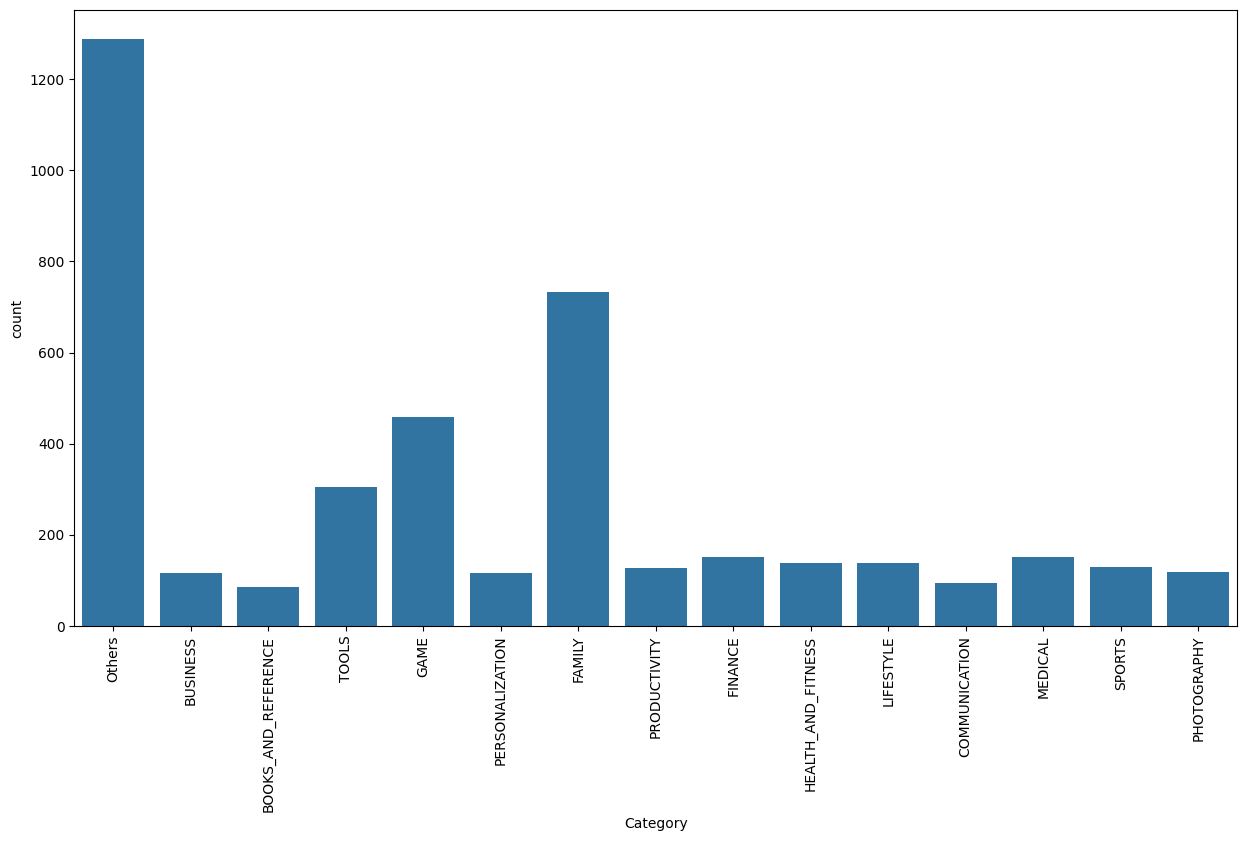

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90);

- *Apps present under Others category are maximum in number*
- *Apart from Others category, most of the apps are in Family Category comprising around 17% of the total apps*
- *Very few apps around 1-2% of apps are in Books and Reference, and Communication Category*

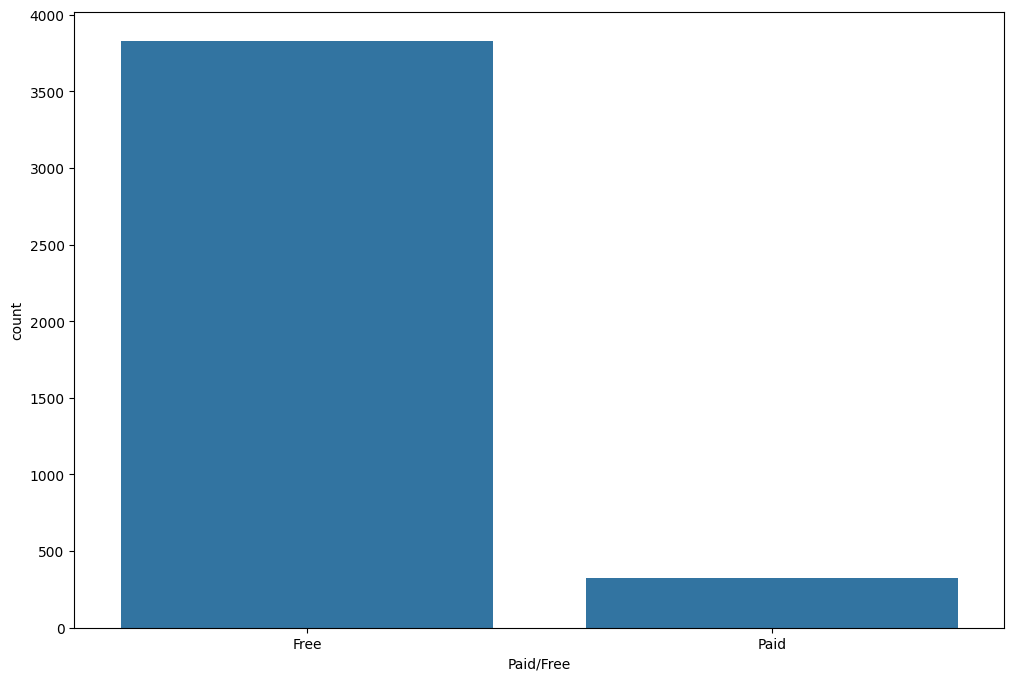

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Paid/Free');

- *Around 91% of the apps are free to use in play store*

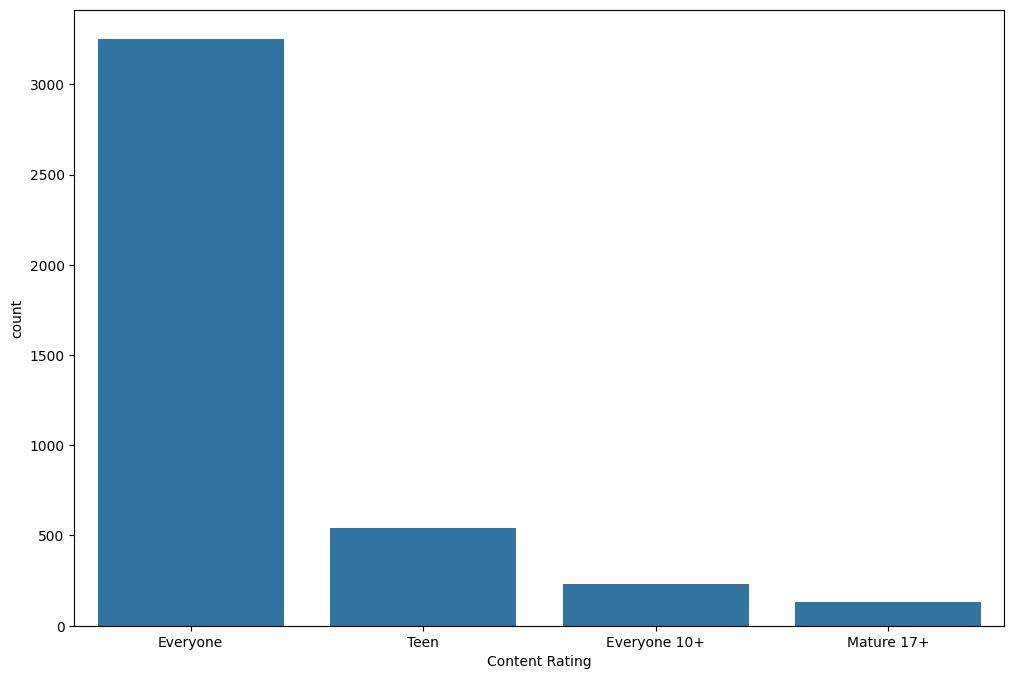

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Content Rating');

- *Most of the apps have a content rating of 'Everyone', which means around 75% of apps can be used by all age groups of users*

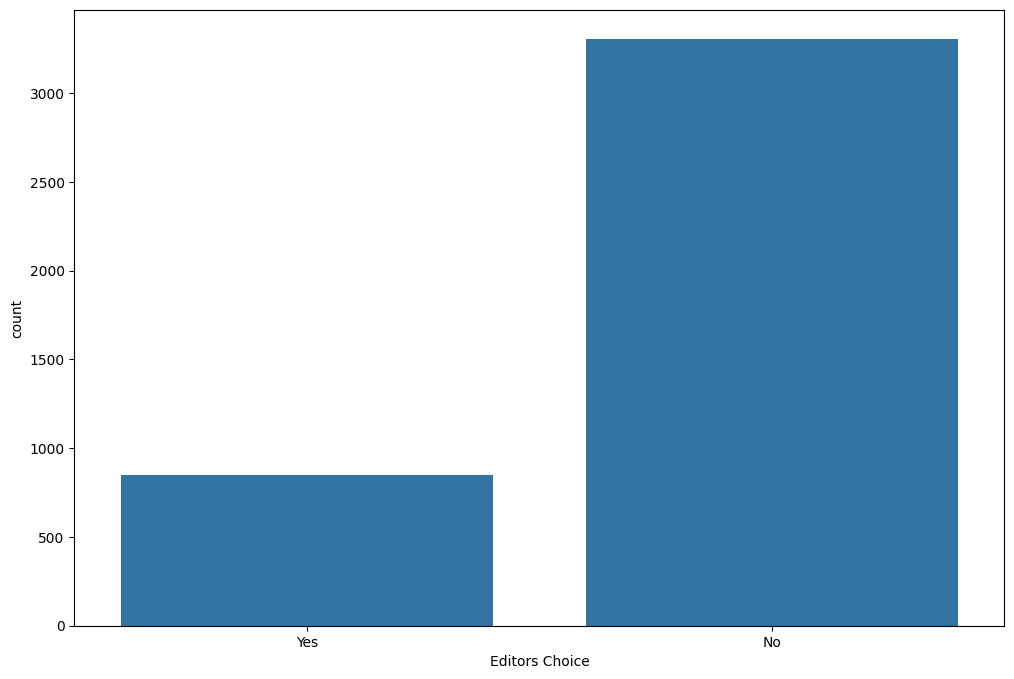

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Editors Choice');

- *Around 80% of the apps are not recommended by the Editors*

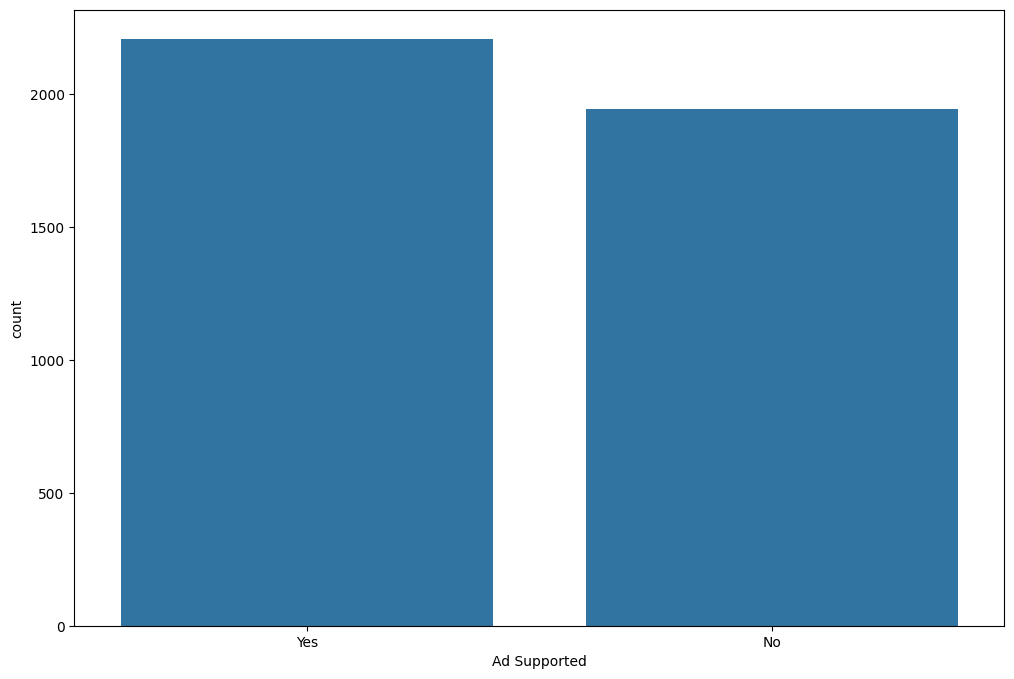

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Ad Supported');

- *Although there is not much significant difference between the apps which support the Ads and not, it can still be observed that Apps which support Ads are 6% higher than Apps which do not support Ads*

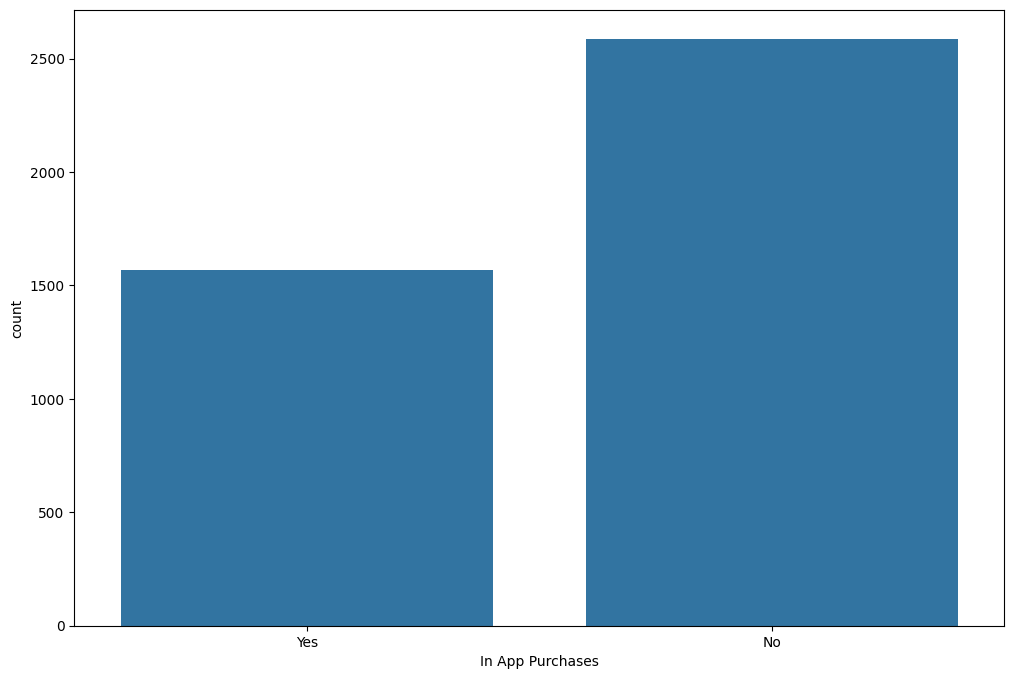

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='In App Purchases');

- *It is interesting to note that most of the apps do no have feature of In app purchases*
- *Only 36% of the apps have In app purchases feature*

As the revenue for the apps which are free to use comes mostly from Advertisements and In App Purchases, therefore free apps are likely to have in-app purchases feature and adverrtisements

Let's check among free apps, the proportion of apps supporting in app pruchases and contain ads

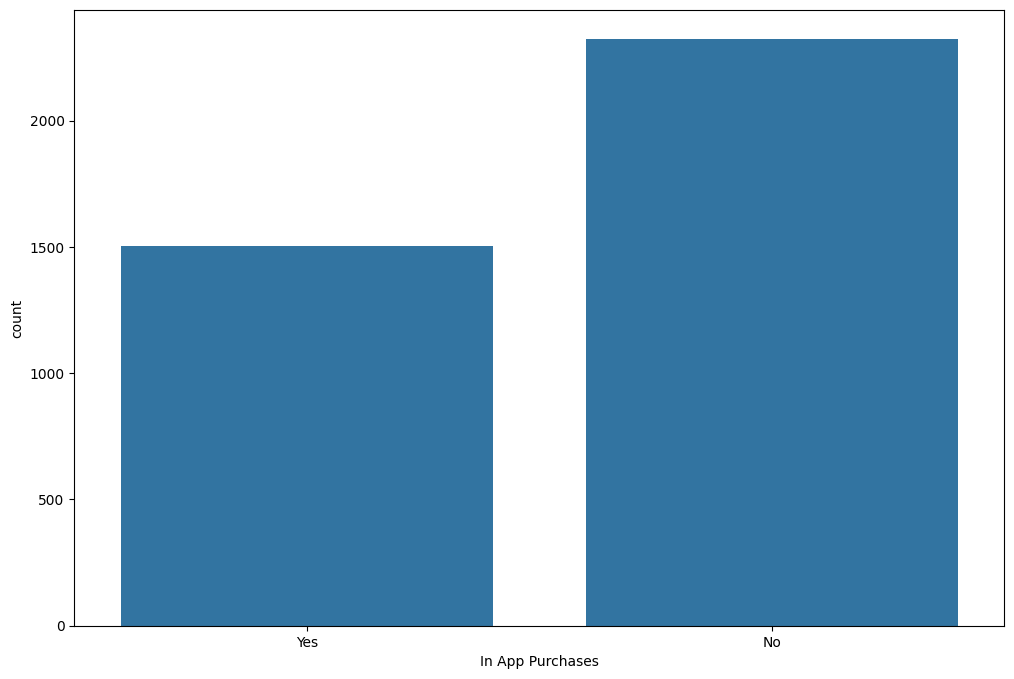

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Paid/Free']=='Free'], x='In App Purchases');

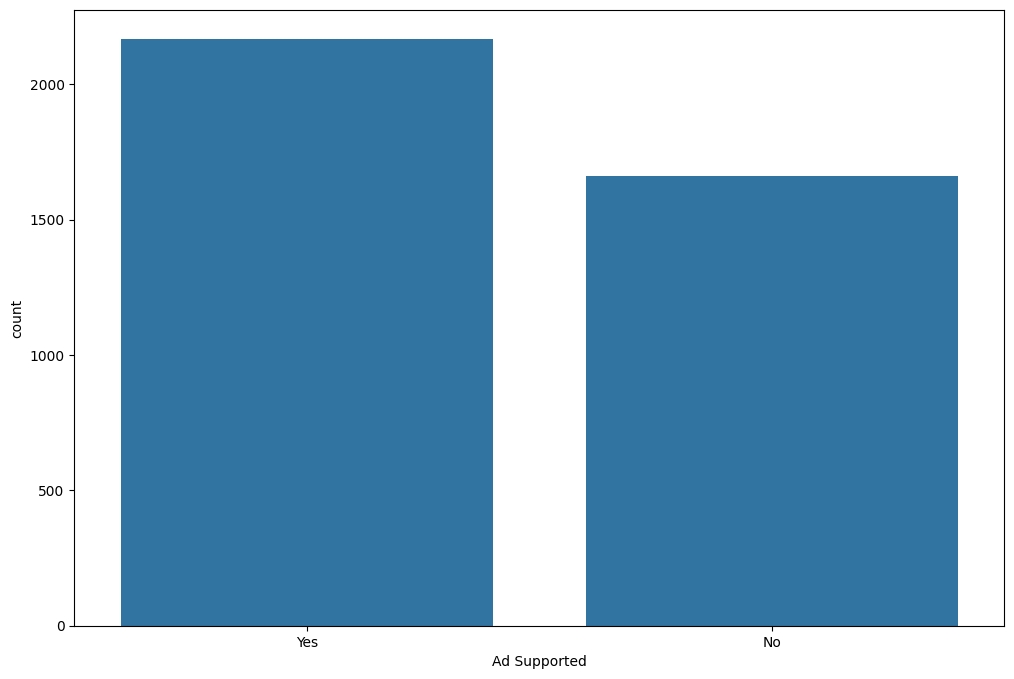

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Paid/Free']=='Free'], x='Ad Supported');

- *Around 60% of free apps does not have In app puchase feature, whereas only 40% of free apps does not contain ads*

### **Bivariate Analysis**

Let's check relationship of categories with ratings and reviews as to know which category is trending

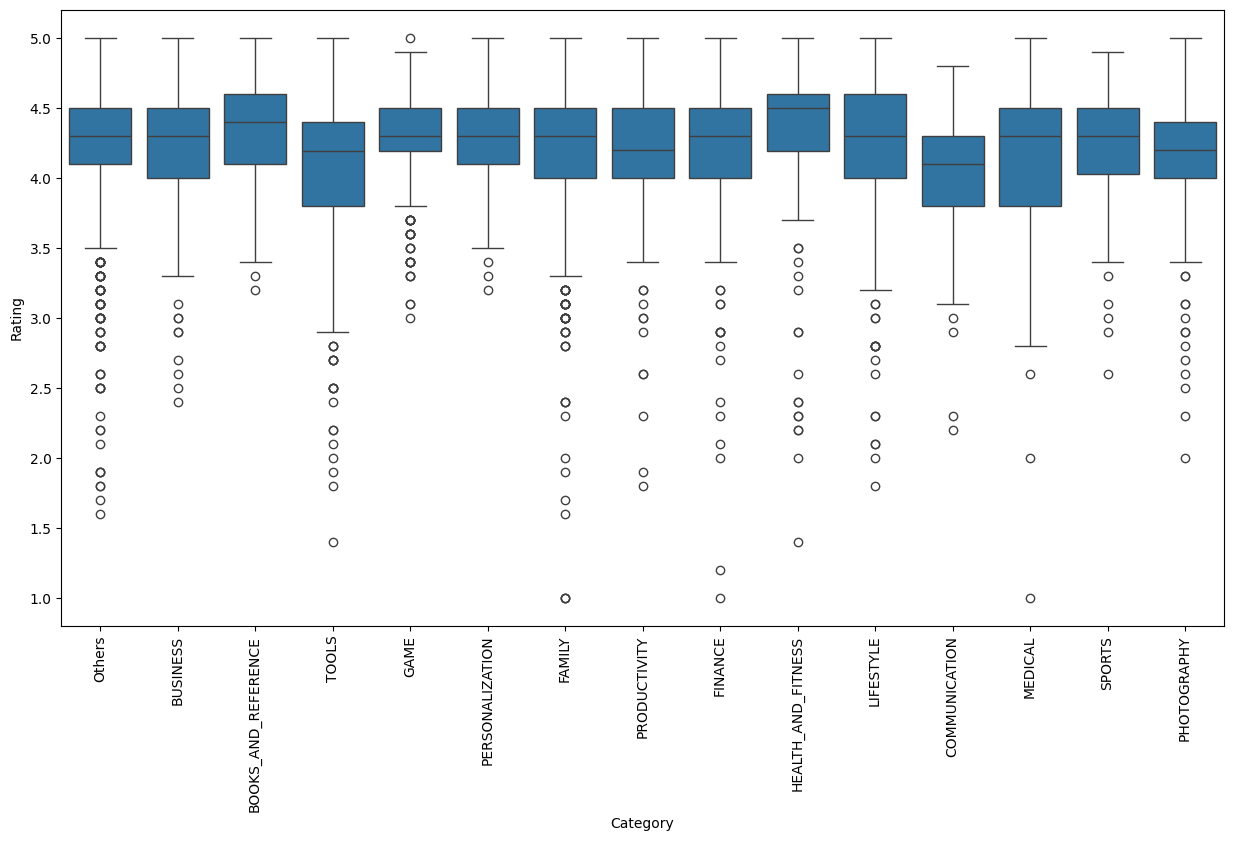

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90);

- *As it can be observed that median ratings of all categories are above 4 with some outliers at the bottom, which means 50% of the apps in Play Store have been rated more than 4*


<ipython-input-26-e6b005f405e2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Category', y='Reviews', ci=False, estimator='sum')


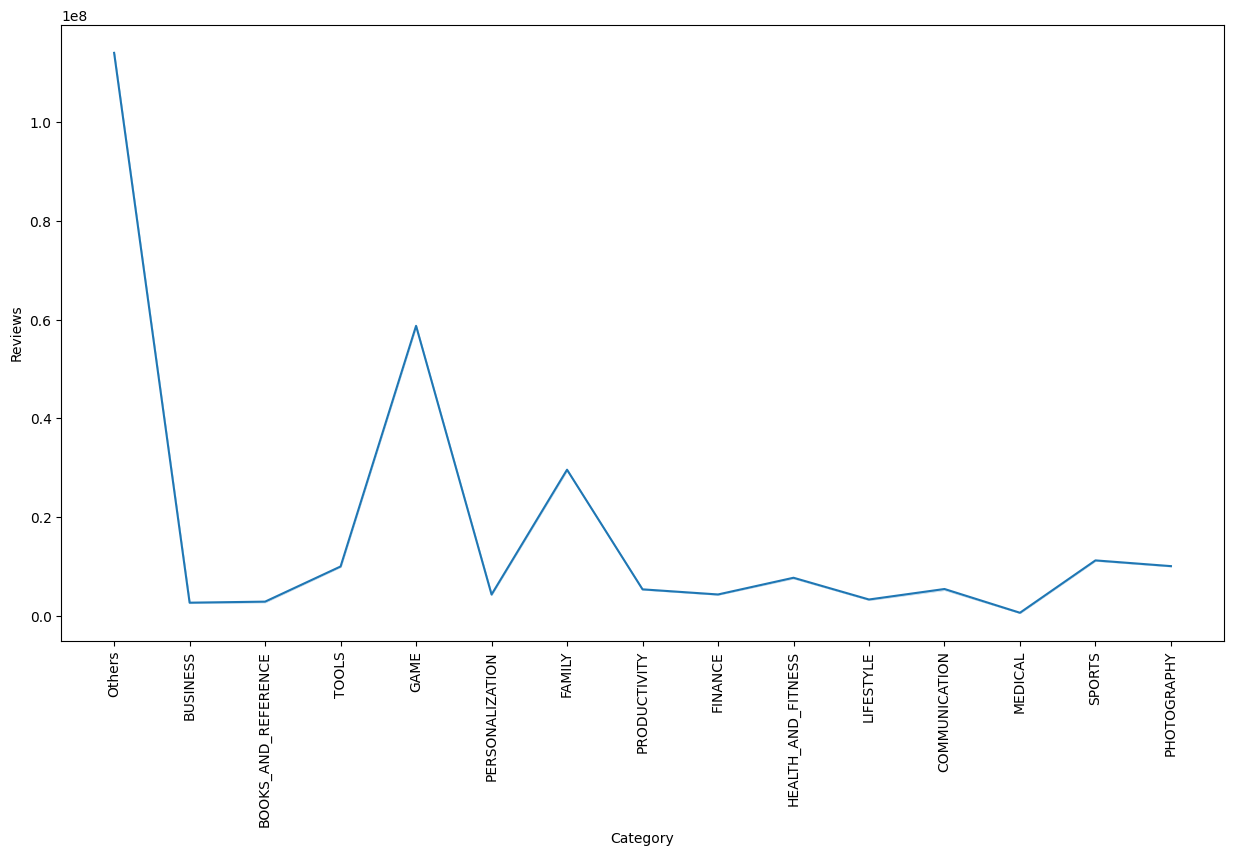

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Reviews', ci=False, estimator='sum')
plt.xticks(rotation=90);

- *Others category has recieved highest number of reviews*
- *Apart from that, Category **Game** has received highest reviews from the users followed by **Family** Category*
- *It should be noted that even though category **Family** has apps more than category **Game**, but it has received less number of reviews than Game category*
- *Therefore, it can be inferred that this category is less used by the users apart from the fact that it has high number of apps*

<ipython-input-27-d8c65d8f93c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Category', y='Installs', ci=False, estimator='sum')


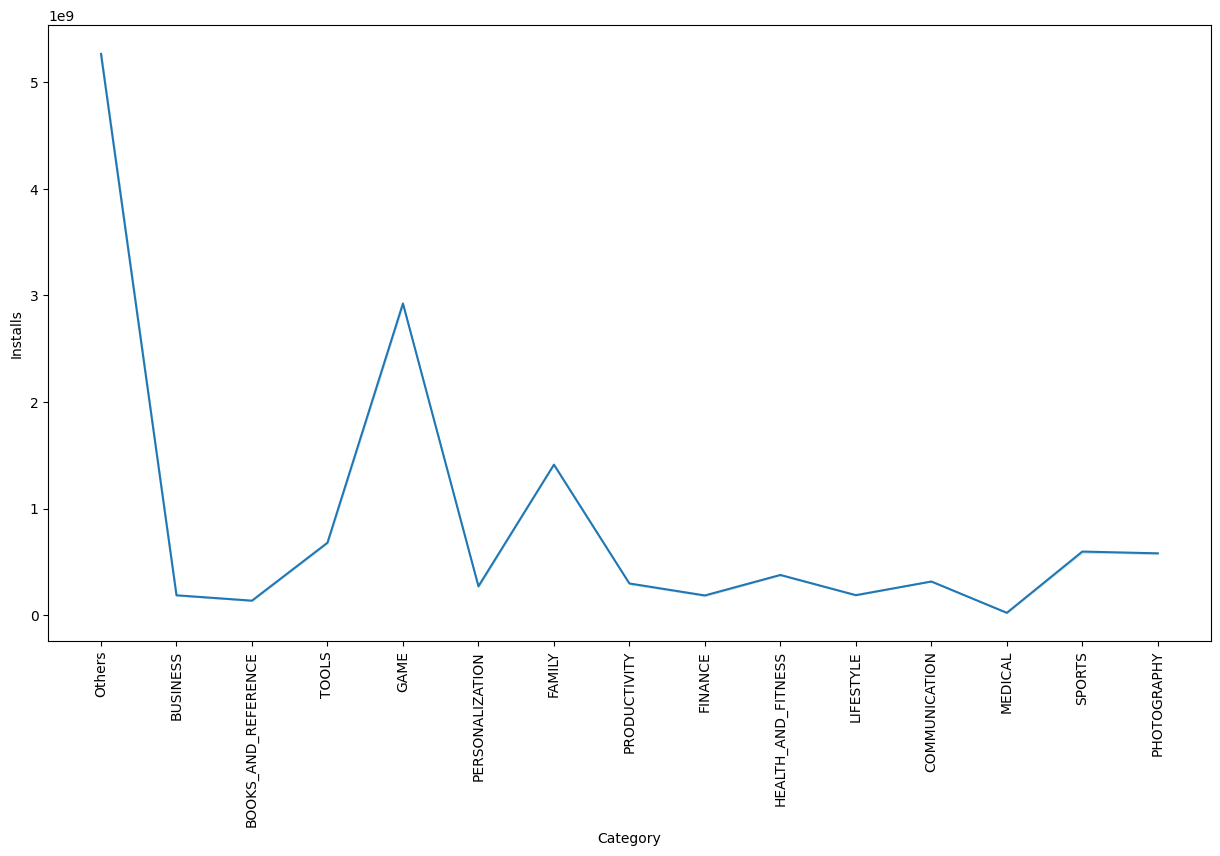

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Installs', ci=False, estimator='sum')
plt.xticks(rotation=90);

- *The trend of installation of apps is almost same as for the Reviews in apps*
- *Apps present in category Game has been installed more number of times than any other Category except those apps which are under Others Category*
- *Apps in Medical Category are installed least followed by Finance, Business and Books and References*

<ipython-input-28-d6ffea8103a6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Category', y='Price' , ci=False, estimator='sum')


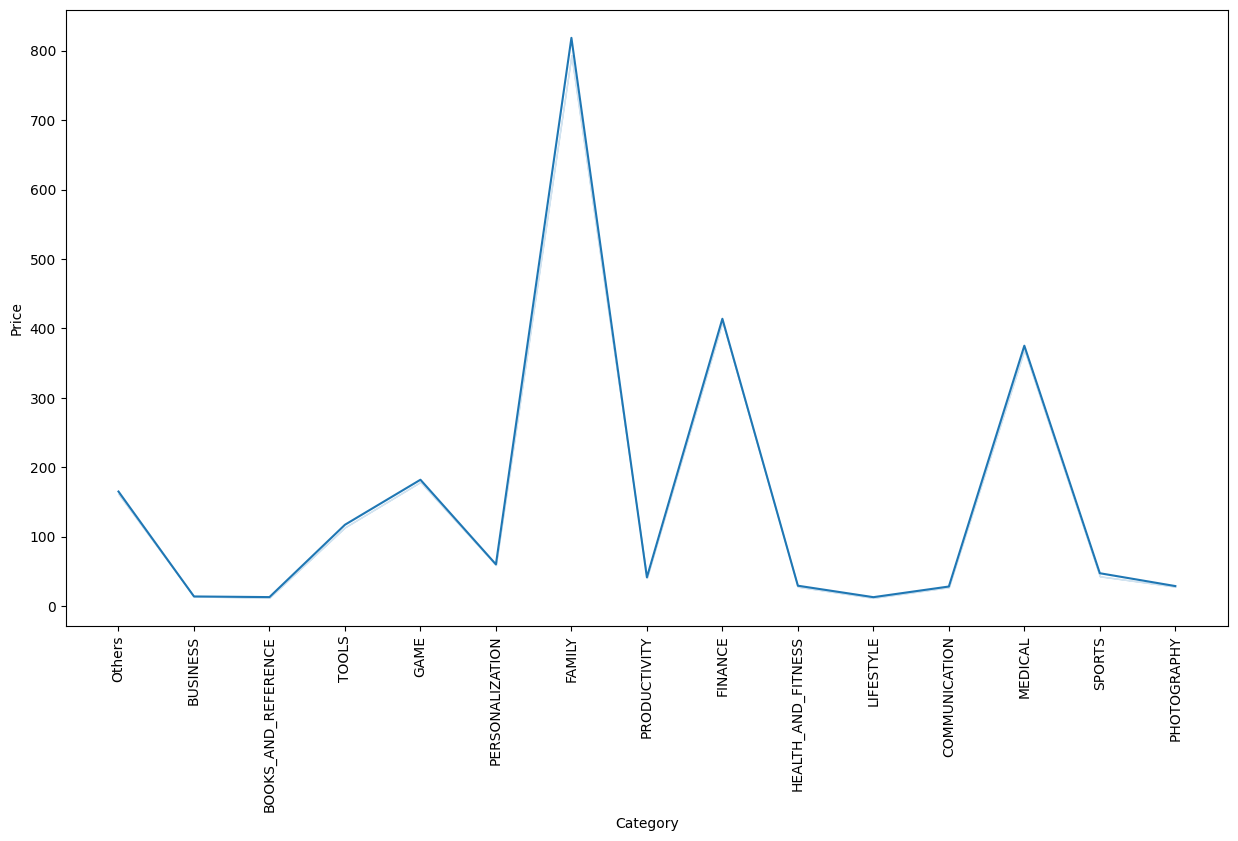

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Price' , ci=False, estimator='sum')
plt.xticks(rotation=90);

- *Apps present in Family Category are costliest as compared to any other Category*
- *Even though the apps under Family category are costlier, the installation of these apps is higher than other apps except for Others and Game Category*
- *It is interesting to observe that Apps under Finance and Medical categroy are also costlier, and this can be the reason that these apps are installed in a very frequency*
- *Business and Books and References apps are not costlier and they are not been installed by the users, which means the apps present in these categories are least preferred by the users*

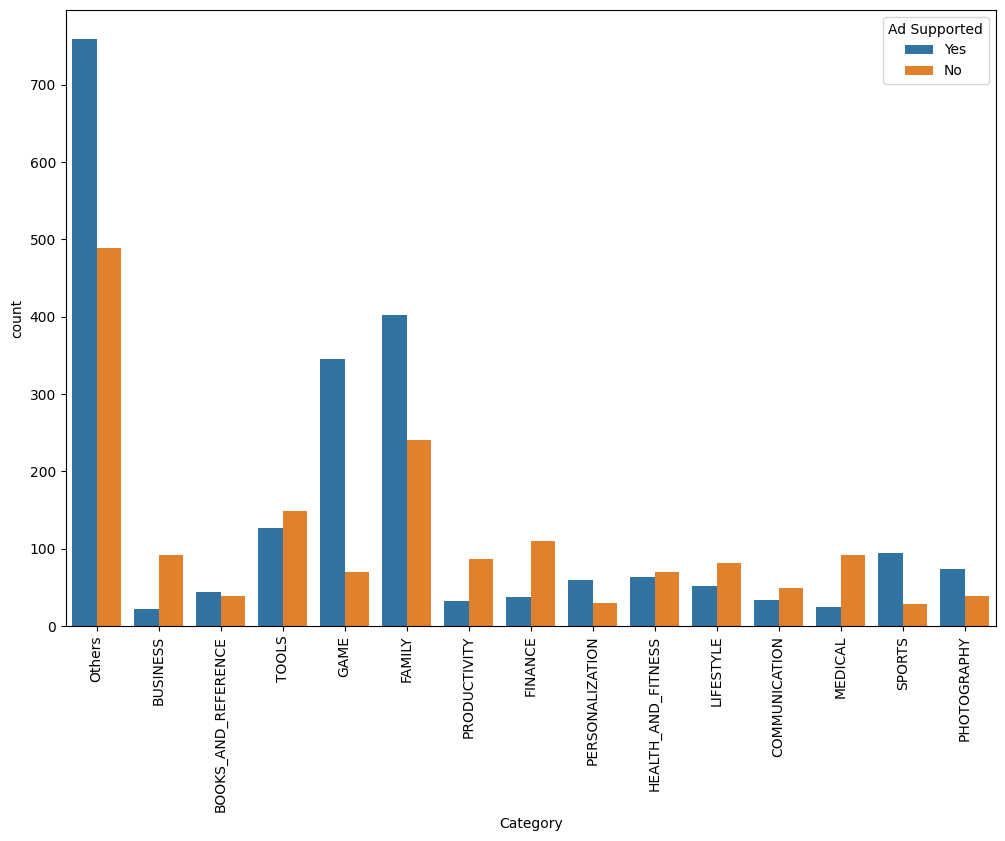

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data= df[df['Paid/Free']=='Free'], x='Category', hue='Ad Supported')
plt.xticks(rotation=90);

- *Among free apps, Others category is highest*
- *Apart from that Family Category has higher number of apps followed by Game and Tools category*
- *Family and Game category has apps which have a significant difference between apps supporting Ads or not*
- *Apps under Medical and Finance like categories, higher proportion is towards apps which do not support Ads, even after they are free to use*

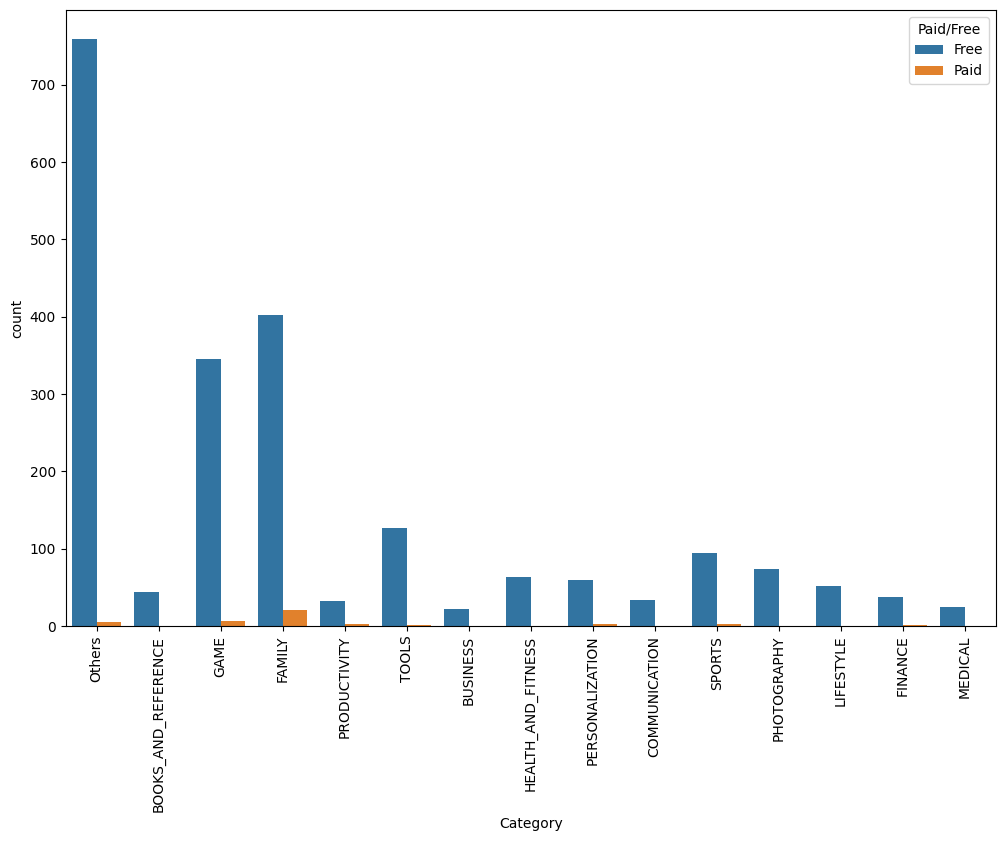

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Ad Supported']=='Yes'], x='Category', hue='Paid/Free')
plt.xticks(rotation=90);

- *Apps which have Ad support feature are mostly free to use in all the categories*

It is observed that Reviews and Installation followed almost similar trends, therefore they may have some relationship with each other.

Let's check if there is any relationship between these 2 variables and also with any other variable

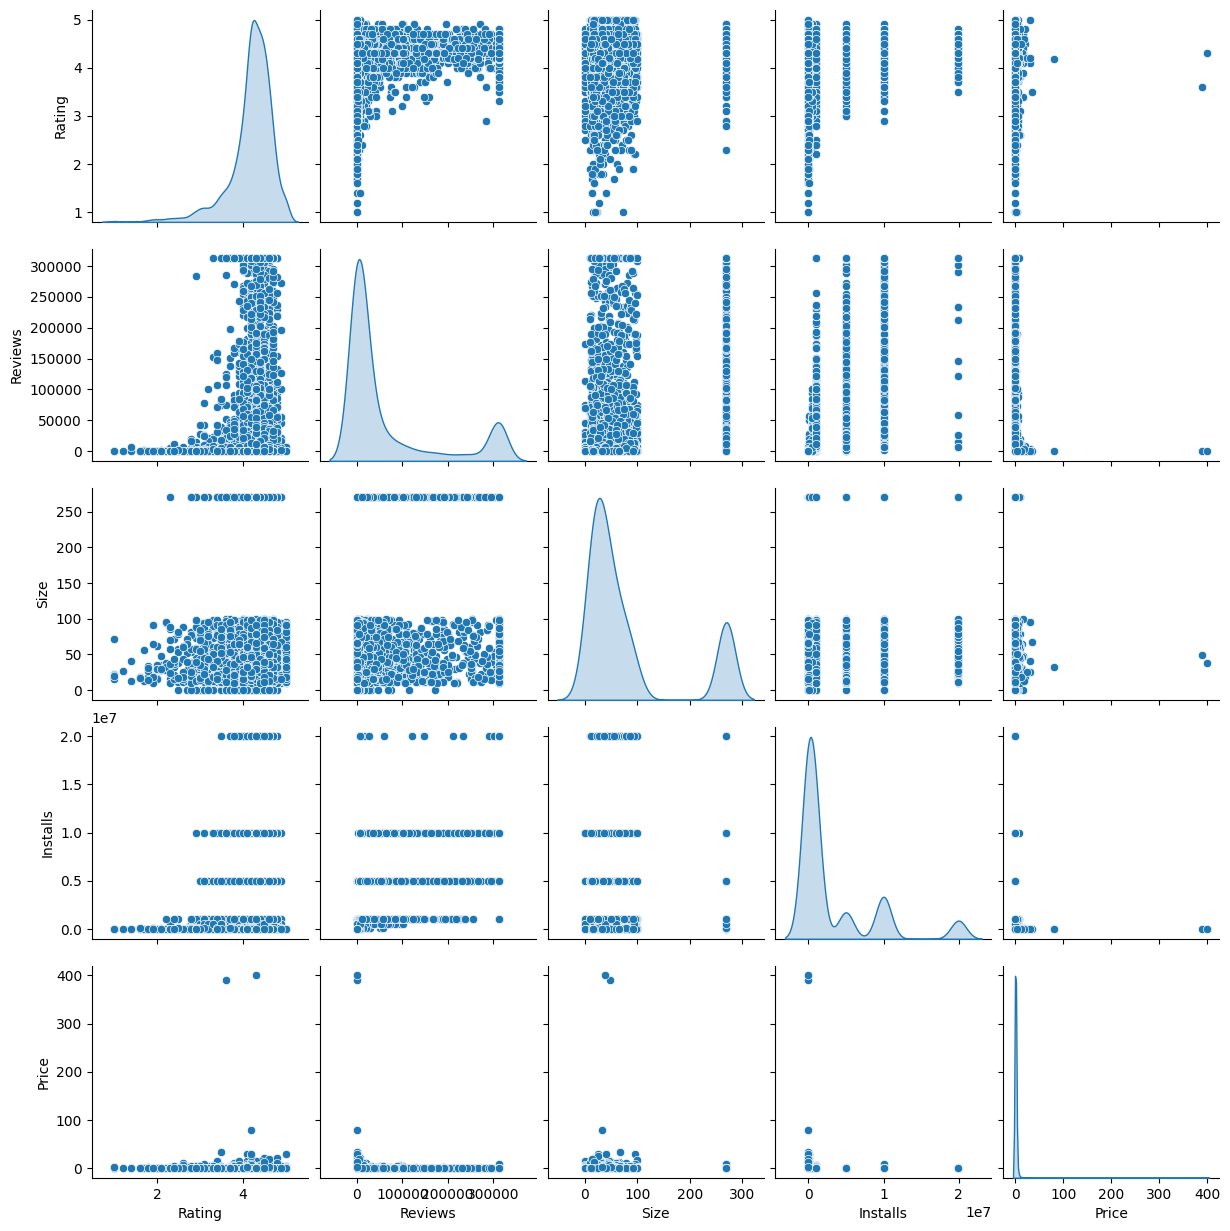

In [31]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

<ipython-input-32-002bdc16c3b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


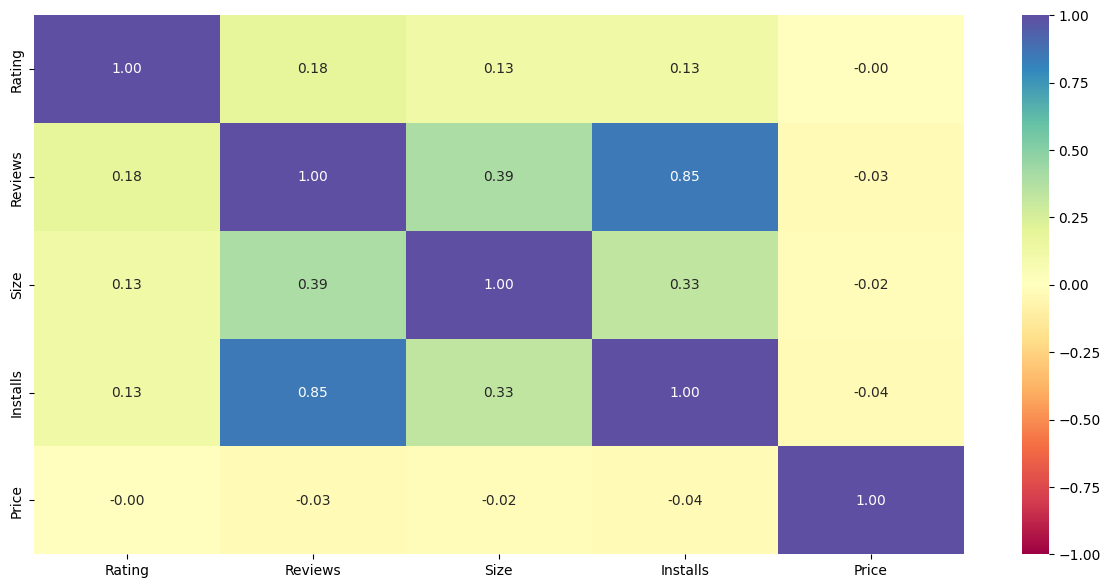

In [32]:
corr = df.corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, Installs and Reviews have a strong correlation with each other*
- *There is no such relationship between any of the other variables*

### **Outlier Detection and Treatment**

**Let's visualize all the outliers present in data together**

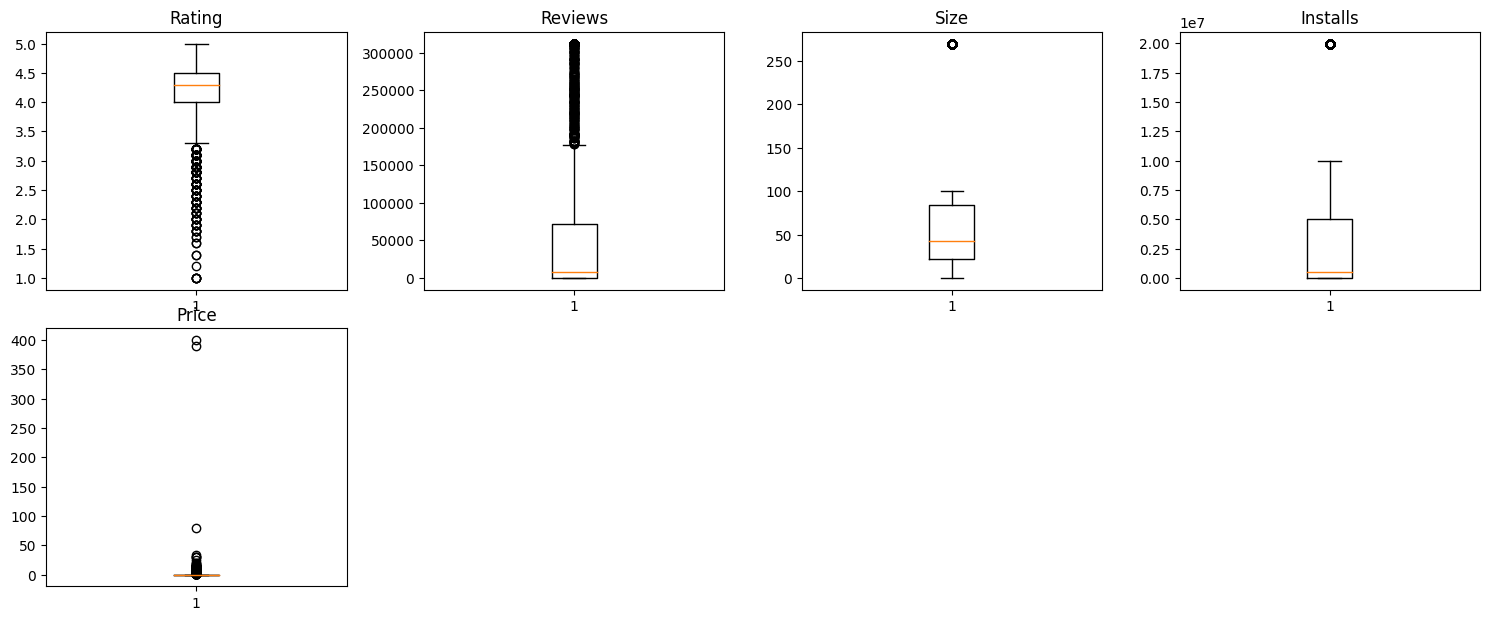

In [33]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *The `Reviews` column has a wide range of values with lots of outliers. However we are not going to treat this column since the reviews can have a varying range and we can miss out on some genuine values if we treat this column*
- *Almost all the columns have outliers present in it*

### **Conclusions**

The Dataset extracted from the Google Play store has been analysed to understand the trend of categories which can be beneficial for investors. With the help of descriptive analysis and visualisations, some insights have been drawn as below:

1. *There are a total of 16 categories, among which apps under the Others category are maximum. Since these apps are a mixture of different categories, it will be difficult to conclude which type of app is trending. However, we can look for the second-best category i.e. **Family** category which has the most number of apps*
2. *This category of apps is also trending as apps that are free to use and also support Ads*
3. *There is a significant difference for free apps between apps that support Ads or not*
4. *Almost 80% of apps are rated for all Age groups of users*
5. *Ratings for apps does not show any significant effect based on categorization of apps*
6. *Higher the number of reviews, higher will be the installation of those apps*
7. *Apps under Family category being costlier than other categories still manages to get good ratings, an optimum number of Reviews and installations*
8. *It can be inferred that apps under category **Family** are trending along with some other categories like **Game**, **Tools** etc.*


### **Recommendations**

1. *Agency should focus on apps under **Family** category for Advertisement as they are significantly trending in the market. They can invest in other categories like **Game** and **Tools** as they also contain trending apps*
2. *Since apps which support Ads are mostly free to use, Agency should look forward to invest in free apps rather than paid apps*
3. *Investing in free apps under category like **Finance**, **Medical**, should be avoided as they do not support advertisements*
4. *As there is a high correlation between Reviews and Installations, therefore agency should check for those apps which have high number of reviews as those apps are more likely to get installed*
5. *Agency should not invest in apps under category **Business**, **Books and References** as they are not preferred by the users as they have very low number of installations even they are free to use*